<a href="https://colab.research.google.com/github/Silva-TI/MachineLearning-Silva/blob/main/Latihan_3_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Memuat Data ---
df = pd.read_csv('/content/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
# 2. IDENTIFIKASI FITUR
categorical_features = ['Cloud Cover', 'Season', 'Location']
target_column = 'Weather Type'

# a. Encoding Fitur Independen (X) menggunakan One-Hot Encoding
X = pd.get_dummies(df.drop(columns=[target_column]), columns=categorical_features, drop_first=True)

# b. Encoding Variabel Dependen (y) menggunakan Label Encoding (Menjadi 0, 1, 2, ...)
le = LabelEncoder()
y = le.fit_transform(df[target_column])

# Menampilkan peta encoding target
target_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("--- Peta Label Encoding untuk Weather Type ---")
print(target_mapping)

print("\n--- 5 Nilai Target (y) Setelah Encoding ---")
# Menampilkan 5 nilai pertama dari array target yang sudah di-encode
# Output ini akan langsung menampilkan angka 0, 1, 2, dst.
print(y[:5])
print("\n--- 5 Baris Pertama Fitur (X) Setelah Encoding ---")
print(X.head())
print("\n" + "="*50)

--- Peta Label Encoding untuk Weather Type ---
{'Cloudy': np.int64(0), 'Rainy': np.int64(1), 'Snowy': np.int64(2), 'Sunny': np.int64(3)}

--- 5 Nilai Target (y) Setelah Encoding ---
[1 0 3 3 1]

--- 5 Baris Pertama Fitur (X) Setelah Encoding ---
   Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
1         39.0        96         8.5               71.0               1011.43   
2         30.0        64         7.0               16.0               1018.72   
3         38.0        83         1.5               82.0               1026.25   
4         27.0        74        17.0               66.0                990.67   

   UV Index  Visibility (km)  Weather Type Encoded  Cloud Cover_cloudy  \
0         2              3.5                     1               False   
1         7             10.0                     2               False   
2         5              5.5                 

In [ ]:
# Asumsi: Anda sudah memiliki DataFrame bernama 'data'
# Memisahkan fitur (X) dan label/target (y)
X = df.drop('Weather Type', axis=1) # Ganti 'target_column' dengan nama kolom target Anda
y = df['Weather Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Inisialisasi StandardScaler
scaler_new = StandardScaler()

# Latih scaler pada data latih yang sudah di-encode dan transformasikan
X_train_scaled_new = scaler_new.fit_transform(X_train_encoded)

# Transformasikan data uji yang sudah di-encode menggunakan scaler yang sama
X_test_scaled_new = scaler_new.transform(X_test_encoded)

# Konversi kembali ke DataFrame untuk menggunakan .head()
X_train_scaled_df = pd.DataFrame(X_train_scaled_new, columns=X_train_encoded.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled_new, columns=X_test_encoded.columns)

print("5 baris pertama X_train_scaled_df setelah penskalaan:")
display(X_train_scaled_df.head())


5 baris pertama X_train_scaled_df setelah penskalaan:


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type Encoded,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,0.264837,0.318957,1.117117,0.956427,-0.163897,-0.262982,-0.142568,-0.456480,-0.177751,1.089487,-0.732578,-0.495938,2.083516,-0.857065,-0.755575,1.333459
1,1.533660,0.021148,-0.913519,-0.326512,-4.448577,2.066794,0.006048,0.441322,5.625849,-0.917863,-0.732578,2.016380,-0.479958,-0.857065,1.323495,-0.749930
2,0.264837,0.914574,1.189639,0.361894,0.154857,-0.780710,-1.182878,-0.456480,-0.177751,-0.917863,1.365042,2.016380,-0.479958,-0.857065,1.323495,-0.749930
3,-1.061659,1.659095,3.655412,1.144174,-0.473403,0.254746,-0.439800,-1.354281,-0.177751,1.089487,-0.732578,-0.495938,-0.479958,1.166773,-0.755575,1.333459
4,1.302965,0.914574,1.117117,1.457085,0.282413,1.031338,0.749126,0.441322,-0.177751,-0.917863,1.365042,-0.495938,2.083516,-0.857065,1.323495,-0.749930


In [ ]:
# Tentukan nilai K, misalnya K=5
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

# Latih model menggunakan data latih yang sudah di-scale
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [49]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE (random_state=42, k_neighbors=1)
x_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train) # Corrected x_train_scaled to X_train_scaled
print("After SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
Weather Type
Cloudy    2345
Rainy     2318
Sunny     2310
Snowy     2267
Name: count, dtype: int64
After SMOTE:
Weather Type
Rainy     2345
Cloudy    2345
Snowy     2345
Sunny     2345
Name: count, dtype: int64


In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': list (range(1,31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, error_score=0)
grid.fit(x_train_smote, y_train_smote)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Best score: 0.9545842217484009


In [56]:
from sklearn.model_selection import cross_val_score

best_knn = grid.best_estimator_
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.9545842217484009
Std Dev: 0.003240657602040647


In [57]:
print("\nClasification Report:")
print(classification_report(y_test, y_pred))


Clasification Report:
              precision    recall  f1-score   support

      Cloudy       0.84      0.90      0.87       955
       Rainy       0.89      0.93      0.91       982
       Snowy       0.99      0.95      0.97      1033
       Sunny       0.97      0.91      0.94       990

    accuracy                           0.92      3960
   macro avg       0.92      0.92      0.92      3960
weighted avg       0.92      0.92      0.92      3960



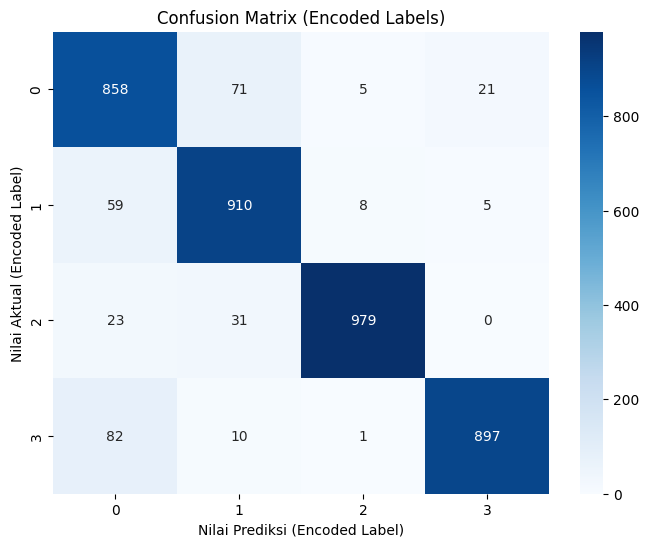

In [ ]:
cm = confusion_matrix(le.transform(y_test), le.transform(y_pred))
plt.figure(figsize=(8, 6))
# Menggunakan nama kelas yang di-encode untuk label sumbu
encoded_labels = sorted(le.transform(le.classes_))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=encoded_labels,
    yticklabels=encoded_labels
)
plt.title('Confusion Matrix (Encoded Labels)')
plt.ylabel('Nilai Aktual (Encoded Label)')
plt.xlabel('Nilai Prediksi (Encoded Label)')
plt.show() # Tampilkan plot confusion matrix

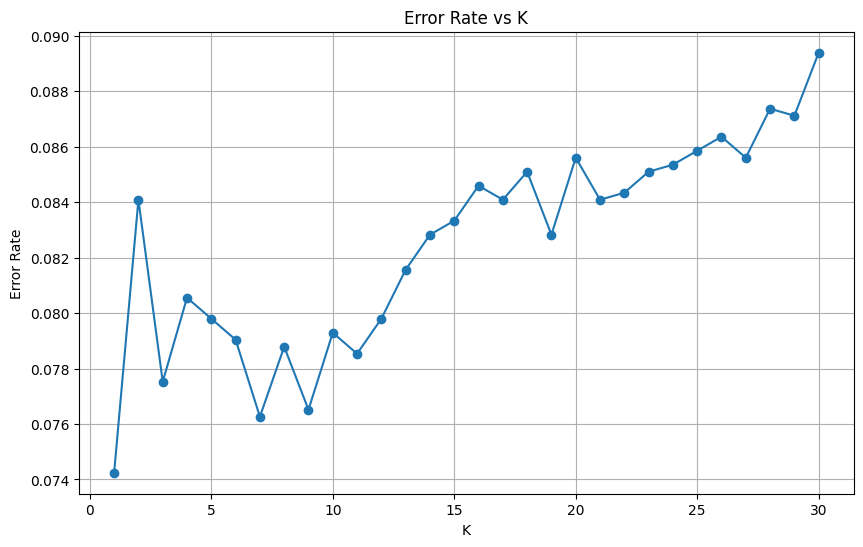

In [ ]:
import numpy as np

errors = []

for k in range(1, 31):
  knn_temp = KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(X_train_scaled_df, y_train)
  pred = knn_temp.predict(X_test_scaled_df)
  errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1,31), errors, marker='o')
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K")
plt.grid(True)
plt.show()